# R code for data analysis with Ebola outbreak simulation data
## The data is from the R outbreaks package from this link "https://github.com/reconverse/outbreaks/tree/master/data"
## The analysis has two parts including descriptive analysis and some simple stats tests 

## 1.1 R descriptive analysis and cross tabs

In [1]:
#importing required packages
pacman::p_load(
  rio,          # File import
  here,         # File locator
  skimr,        # get overview of data
  tidyverse,    # data management + ggplot2 graphics 
  gtsummary,    # summary statistics and tests
  rstatix,      # summary statistics and statistical tests
  janitor,      # adding totals and percents to tables
  scales,       # easily convert proportions to percents  
  flextable     # converting tables to pretty images
  )
        
df = import("Ebola_Outbreak_Simulation.rds")

In [2]:
summary(df)

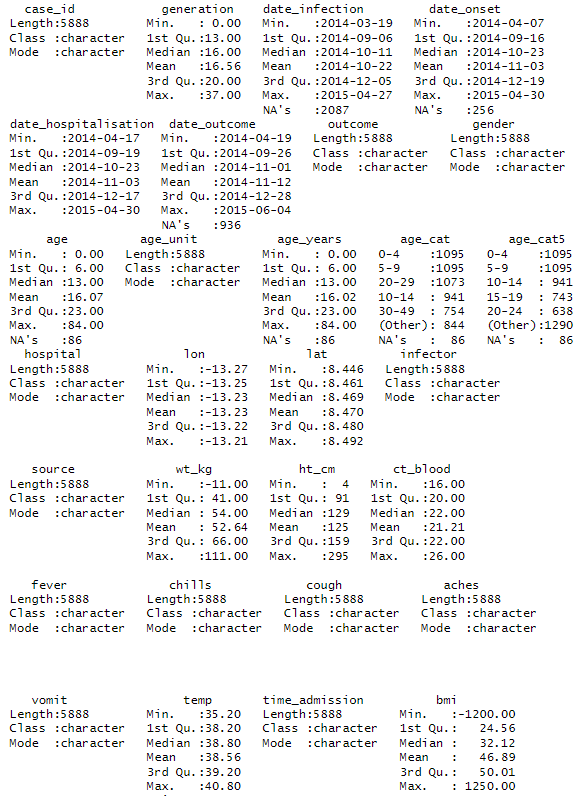

In [6]:
from IPython import display
display.Image("Ebola_Data_OverviewSummary.png")

#### 1.1.1 cross tabulation 1 - we want to see the dat' composition between age category and gender 

In [6]:
df %>%
  tabyl(age_cat, gender) %>% 
  adorn_totals(where = "col") %>% 
  adorn_percentages(denominator = "col") %>% 
  adorn_pct_formatting() %>% 
  adorn_ns(position = "front") %>% 
  adorn_title(
    row_name = "Age Category",
    col_name = "Gender",
    placement = "combined") %>% 
  flextable::flextable() %>%                     # convert to image
  flextable::autofit() %>%                       # ensure only one line per row
  flextable::save_as_docx(path = "Ebola_AgeGroup_VS_Gender_CrossTab.docx")   # save as Word document to filepath

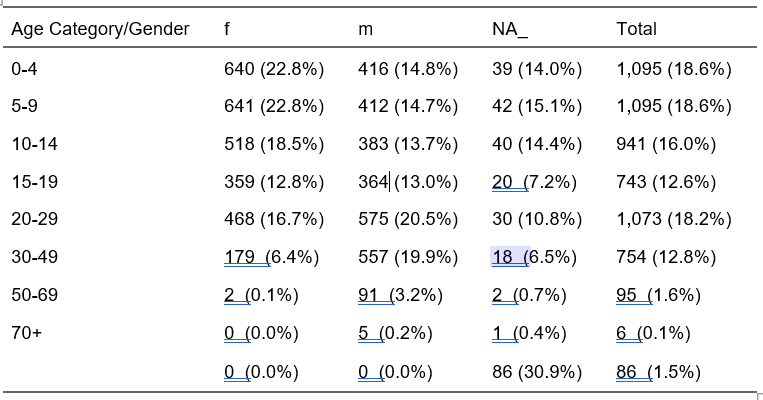

In [5]:
from IPython import display
display.Image("Ebola_AgeGroup_VS_Gender_CrossTab.png")

### 1.1.2 cross tab 2 for death/recover proportion under age categories  

In [ ]:
age_by_outcome <- df %>%                        # begin with linelist
  group_by(outcome) %>%                         # group by outcome 
  count(age_cat) %>%                            # group and count by age_cat, and then remove age_cat grouping
  mutate(percent = scales::percent(n / sum(n))) # calculate percent - note the denominator is by outcome group

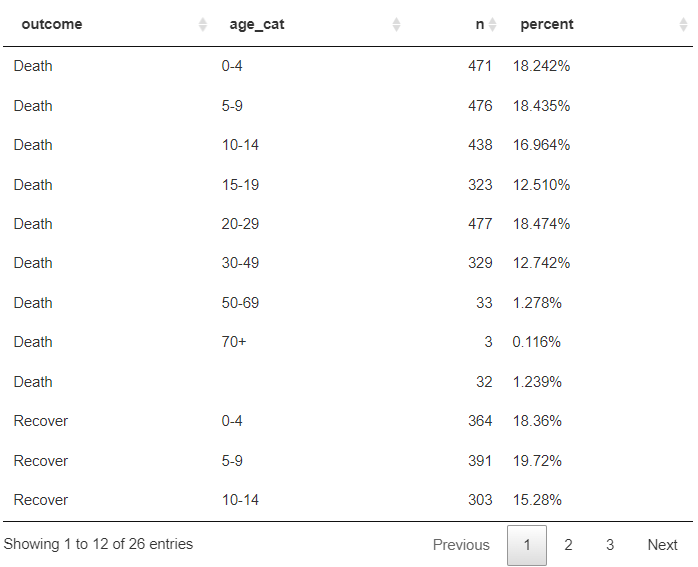

In [7]:
from IPython import display
display.Image("Ebola_AgeGroup_VS_Outcome_CrossTab.png")

### 1.1.3 R ggplot2 visualization showcase

In [ ]:
df %>%                            # begin with df
  count(age_cat, outcome) %>%     # group and tabulate counts by two columns
  ggplot()+                       # pass new data frame to ggplot
    geom_col(                     # create bar plot
      mapping = aes(   
        x = age_cat,              # map outcome to x-axis
        fill = outcome,           # map age_cat to the fill
        y = n)) 
ggsave("Rggplot2 the outcome of Ebola patients among different age groups.png")	

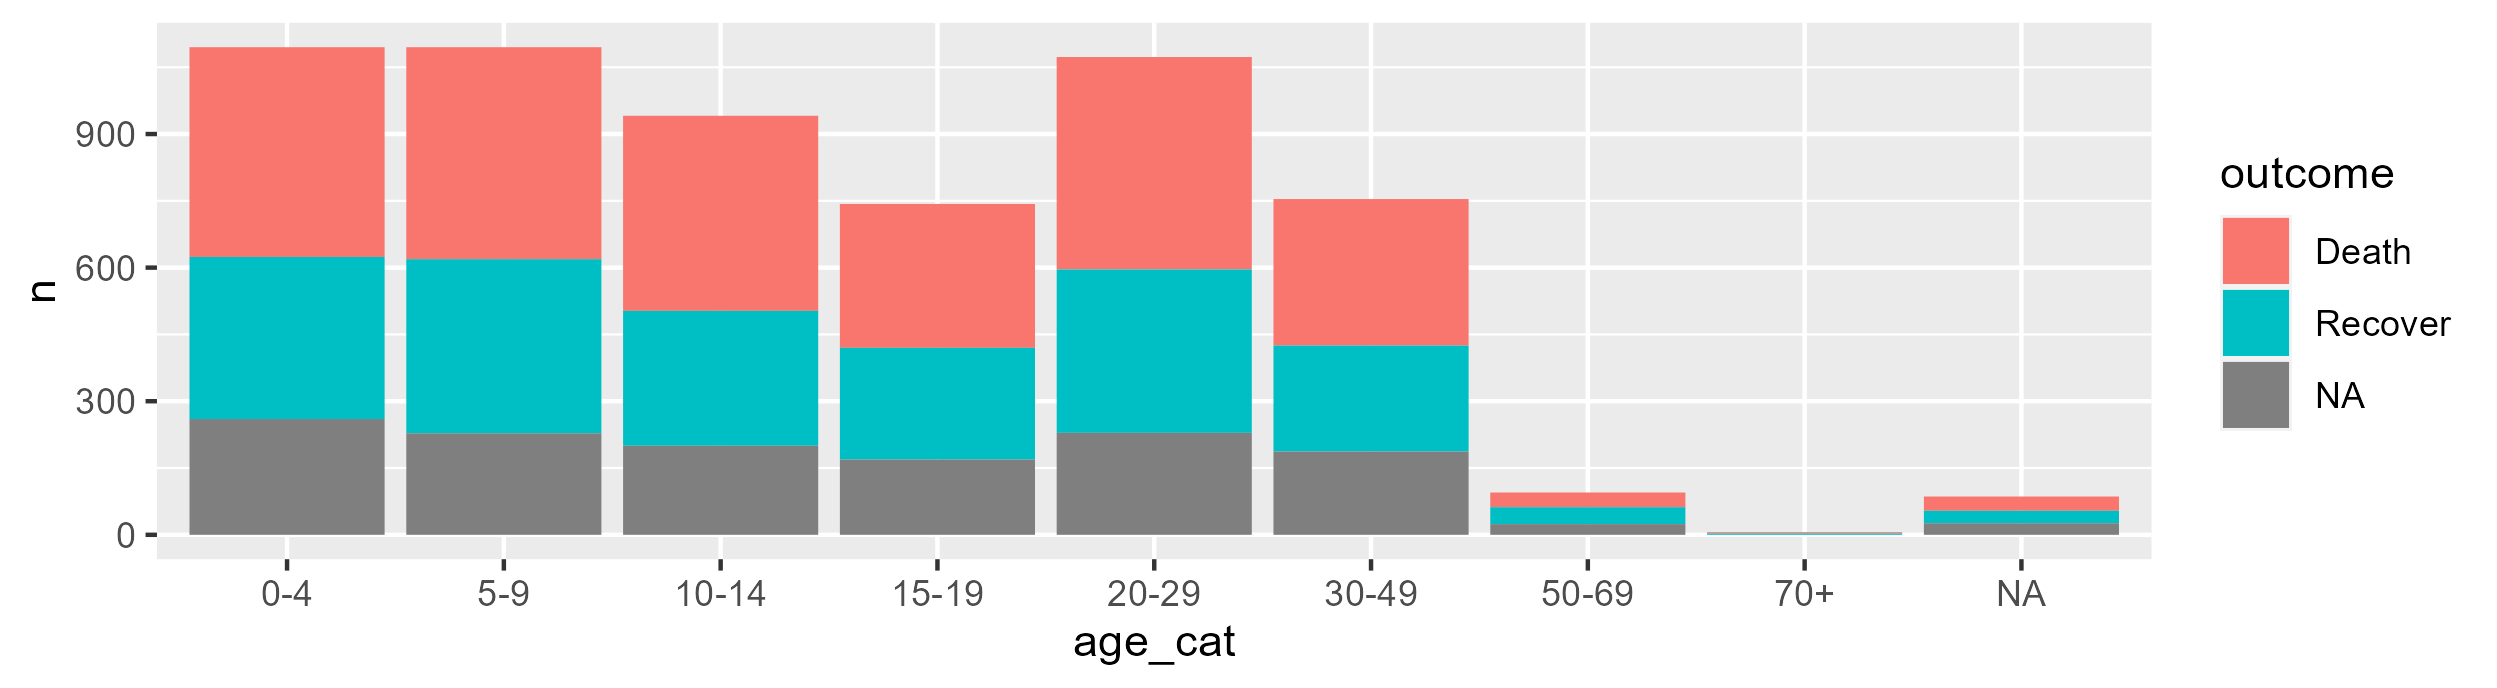

In [8]:
from IPython import display
display.Image("Rggplot2 the outcome of Ebola patients among different age groups.png")

## 1.2 R some stats tests

### 1.2.1 Chi-squared test

In [ ]:
df %>% 
  select(gender, outcome) %>%    # keep variables of interest
  tbl_summary(by = outcome) %>%  # produce summary table and specify grouping variable
  add_p() 

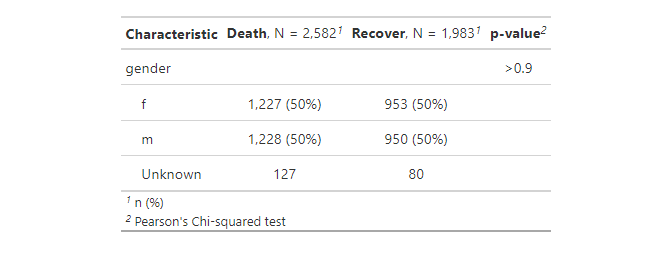

In [10]:
from IPython import display
display.Image("Rplot - Chi-squared test result.png")

### 1.2.2 Kruskal-Wallis test for outcome and age_years

In [ ]:
df %>% 
  select(age_years, outcome) %>%                       # keep variables of interest
  tbl_summary(                                         # produce summary table
    statistic = age_years ~ "{median} ({p25}, {p75})", # specify what statistic to show (default, so could remove)
    by = outcome) %>%                                  # specify the grouping variable
  add_p(age_years ~ "kruskal.test")                    # specify what test to perform

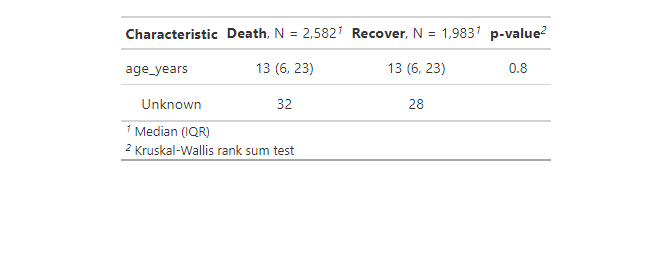

In [11]:
from IPython import display
display.Image("Rplot-Kruskal-Wallis test result.png")

### 1.2.3 T test for gender and age_years

In [ ]:
df %>% 
  select(age_years, outcome) %>%             # keep variables of interest
  tbl_summary(                               # produce summary table
    statistic = age_years ~ "{mean} ({sd})", # specify what statistics to show
    by = outcome) %>%                        # specify the grouping variable
  add_p(age_years ~ "t.test")                # specify what tests to perform

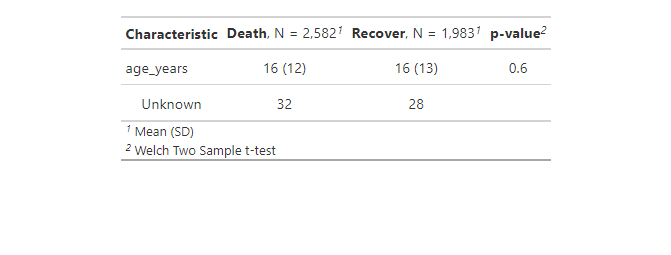

In [13]:
from IPython import display
display.Image("Rplot - T test result.png")